In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from lca_calculation_functions import search_activity

In [4]:
# Brightway imports
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi
import brightway2 as bw

In [5]:
# Custom functions
from lca_calculation_functions import get_inventory_dataset, run_lca, compute_midpoint_contributions

# Set up BW and LCIs

In [6]:
BW_PROJECT = 'metallican' # insert your project name here
bd.projects.set_current(BW_PROJECT)
bd.databases

Databases dictionary with 11 object(s):
	Copper
	Gold
	Iron
	Nickel
	Regioinvent
	Silver
	Zinc
	biosphere3
	biosphere3_spatialized_flows
	ecoinvent-3.10-cutoff
	ecoinvent-3.10-cutoff regionalized

In [7]:
EI_DB = 'ecoinvent-3.10-cutoff'
RI_DB = 'Regioinvent'

In [8]:
iw_methods = [method for method in bd.methods if "impact world+" in " ".join(method).lower()]
iw_methods

[('IMPACT World+ v2.0.1, footprint version',
  'climate change',
  'carbon footprint'),
 ('IMPACT World+ v2.0.1, footprint version',
  'ecosystem quality',
  'remaining ecosystem quality damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'energy resources: non-renewable',
  'fossil and nuclear energy use'),
 ('IMPACT World+ v2.0.1, footprint version',
  'human health',
  'remaining human health damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'water use',
  'water scarcity footprint'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate c

In [9]:
from constants import IMPACT_METHODS_EP, IMPACT_METHODS_MP_EQ, IMPACT_METHODS_MP_HH

In [11]:
INVENTORIES_CA = {
    "Copper concentrate": ("gold-silver mine operation and beneficiation", "copper concentrate, sulfide ore", 'CA-QC'),
    "Gold-silver ingot": ("gold-silver mine operation and beneficiation", "gold-silver, ingot", "CA-QC"),
    "Lead concentrate": ("lead concentrate", "gold-silver, ingot", "CA-QC"),
    "Zinc concentrate": ("zinc concentrate", "gold-silver, ingot", "CA-QC"),
    "Gold refined": ("gold-silver mine operation with refinery", "gold", "CA-QC"),
    "Silver refined": ("gold-silver mine operation with refinery", "silver", "CA-QC"),
    "Iron concentrate": ("iron ore mine operation and beneficiation", "iron ore concentrate", "CA-QC"),
    "Nickel concentrate": ("nickel mine operation and benefication to nickel concentrate, 16% Ni", "nickel concentrate, 16% Ni", "CA-QC"),
}

In [12]:
INVENTORIES_EI_market = {
    "Gold": ("market for gold", "gold", "GLO"),
    "Silver": ("market for silver", "silver", "GLO"),
    "Copper": ("market for copper, cathode", "copper, cathode", 'GLO'),
    "Lead": ("market for lead", "lead", "GLO"),
    "Zinc": ("market for zinc", "zinc", "GLO"),
    "Cobalt": ("market for cobalt", "cobalt", "GLO"),
    "Nickel, class 1": ("market for nickel, class 1", "nickel, class 1", "GLO"),
    #"Platinum ": ("market for platinum group metal concentrate", "platinum group metal concentrate", "ZA"),
    #"Uranium ore": ("market for uranium ore, as U", "uranium ore, as U", "GLO"),
}

In [9]:
INVENTORIES_RI = {
    "Gold": ("consumption market for gold", "gold", "CA"),
    "Silver": ("consumption market for silver", "silver", "CA"),
    "Copper": ("consumption market for copper, cathode", "copper, cathode", 'CA'),    
    "Cobalt": ("consumption market for cobalt", "cobalt", "CA"),

    "Nickel, class 1": ("consumption market for nickel, class 1", "nickel, class 1", "CA"),
    "Platinum": ("consumption market for platinum group metal concentrate", "platinum group metal concentrate", "CA"),
    "Uranium ore": ("consumption market for uranium ore, as U", "uranium ore, as U", "CA"),
    #"Iron ore concentrate": ("consumption market for iron ore concentrate", "iron ore concentrate", "CA") # No consumption market for Canada
}

In [18]:
INVENTORIES_EI_market_ds = get_inventory_dataset(INVENTORIES_EI_market, database_names=[EI_DB])
#INVENTORIES_RI_ds = get_inventory_dataset(INVENTORIES_RI, database_names=[RI_DB])
INVENTORIES_CA_ds = get_inventory_dataset(INVENTORIES_CA, database_names=[EI_DB])

No match found for Lead concentrate in provided databases
No match found for Zinc concentrate in provided databases


# Run simple LCAs

In [11]:
df_ei_ep = run_lca(INVENTORIES_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_EP)

In [12]:
df_ei_eq = run_lca(INVENTORIES_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)

In [13]:
df_ei_hh = run_lca(INVENTORIES_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)

In [14]:
df_ri_ep = run_lca(INVENTORIES_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_EP)

In [15]:
df_ri_eq = run_lca(INVENTORIES_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)

In [16]:
df_ri_hh = run_lca(INVENTORIES_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)

In [22]:
# Replace 'Platinum concentrate' by 'Platinum' for easier reading
df_ri_ep['Commodity'] = df_ri_ep['Commodity'].replace({'Platinum concentrate': 'Platinum'})
df_ri_eq['Commodity'] = df_ri_eq['Commodity'].replace({'Platinum concentrate': 'Platinum'})
df_ri_hh['Commodity'] = df_ri_hh['Commodity'].replace({'Platinum concentrate': 'Platinum'})

In [17]:
with pd.ExcelWriter(r'results\ei_vs_ri.xlsx') as writer:
    df_ei_ep.to_excel(writer, sheet_name='df_ei_ep', index=False)
    df_ei_eq.to_excel(writer, sheet_name='df_ei_eq', index=False)
    df_ei_hh.to_excel(writer, sheet_name='df_ei_hh', index=False)
    df_ri_ep.to_excel(writer, sheet_name='df_ri_ep', index=False)
    df_ri_eq.to_excel(writer, sheet_name='df_ri_eq', index=False)
    df_ri_hh.to_excel(writer, sheet_name='df_ri_hh', index=False)

# MP contributions to EP

In [13]:
damage_method_version="IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10"
all_damage = [m for m in bw.methods if m[0] == damage_method_version]

In [20]:
df_can_hh, df_can_eq = compute_midpoint_contributions(INVENTORIES_CA_ds, amount=1)
df_market_hh, df_market_eq = compute_midpoint_contributions(INVENTORIES_EI_market_ds, amount=1)

In [50]:
#df_hh.to_csv(r'results/human_health_midpoint_contributions.csv', index=False)
#df_eq.to_csv(r'results/ecosystem_quality_midpoint_contributions.csv', index=False)

In [21]:
from visualisation_functions import plot_midpoint_contributions

Plot saved to results/MP_contributions/HH_MP_contributions_can.png
Plot saved to results/MP_contributions/EQ_MP_contributions_can.png


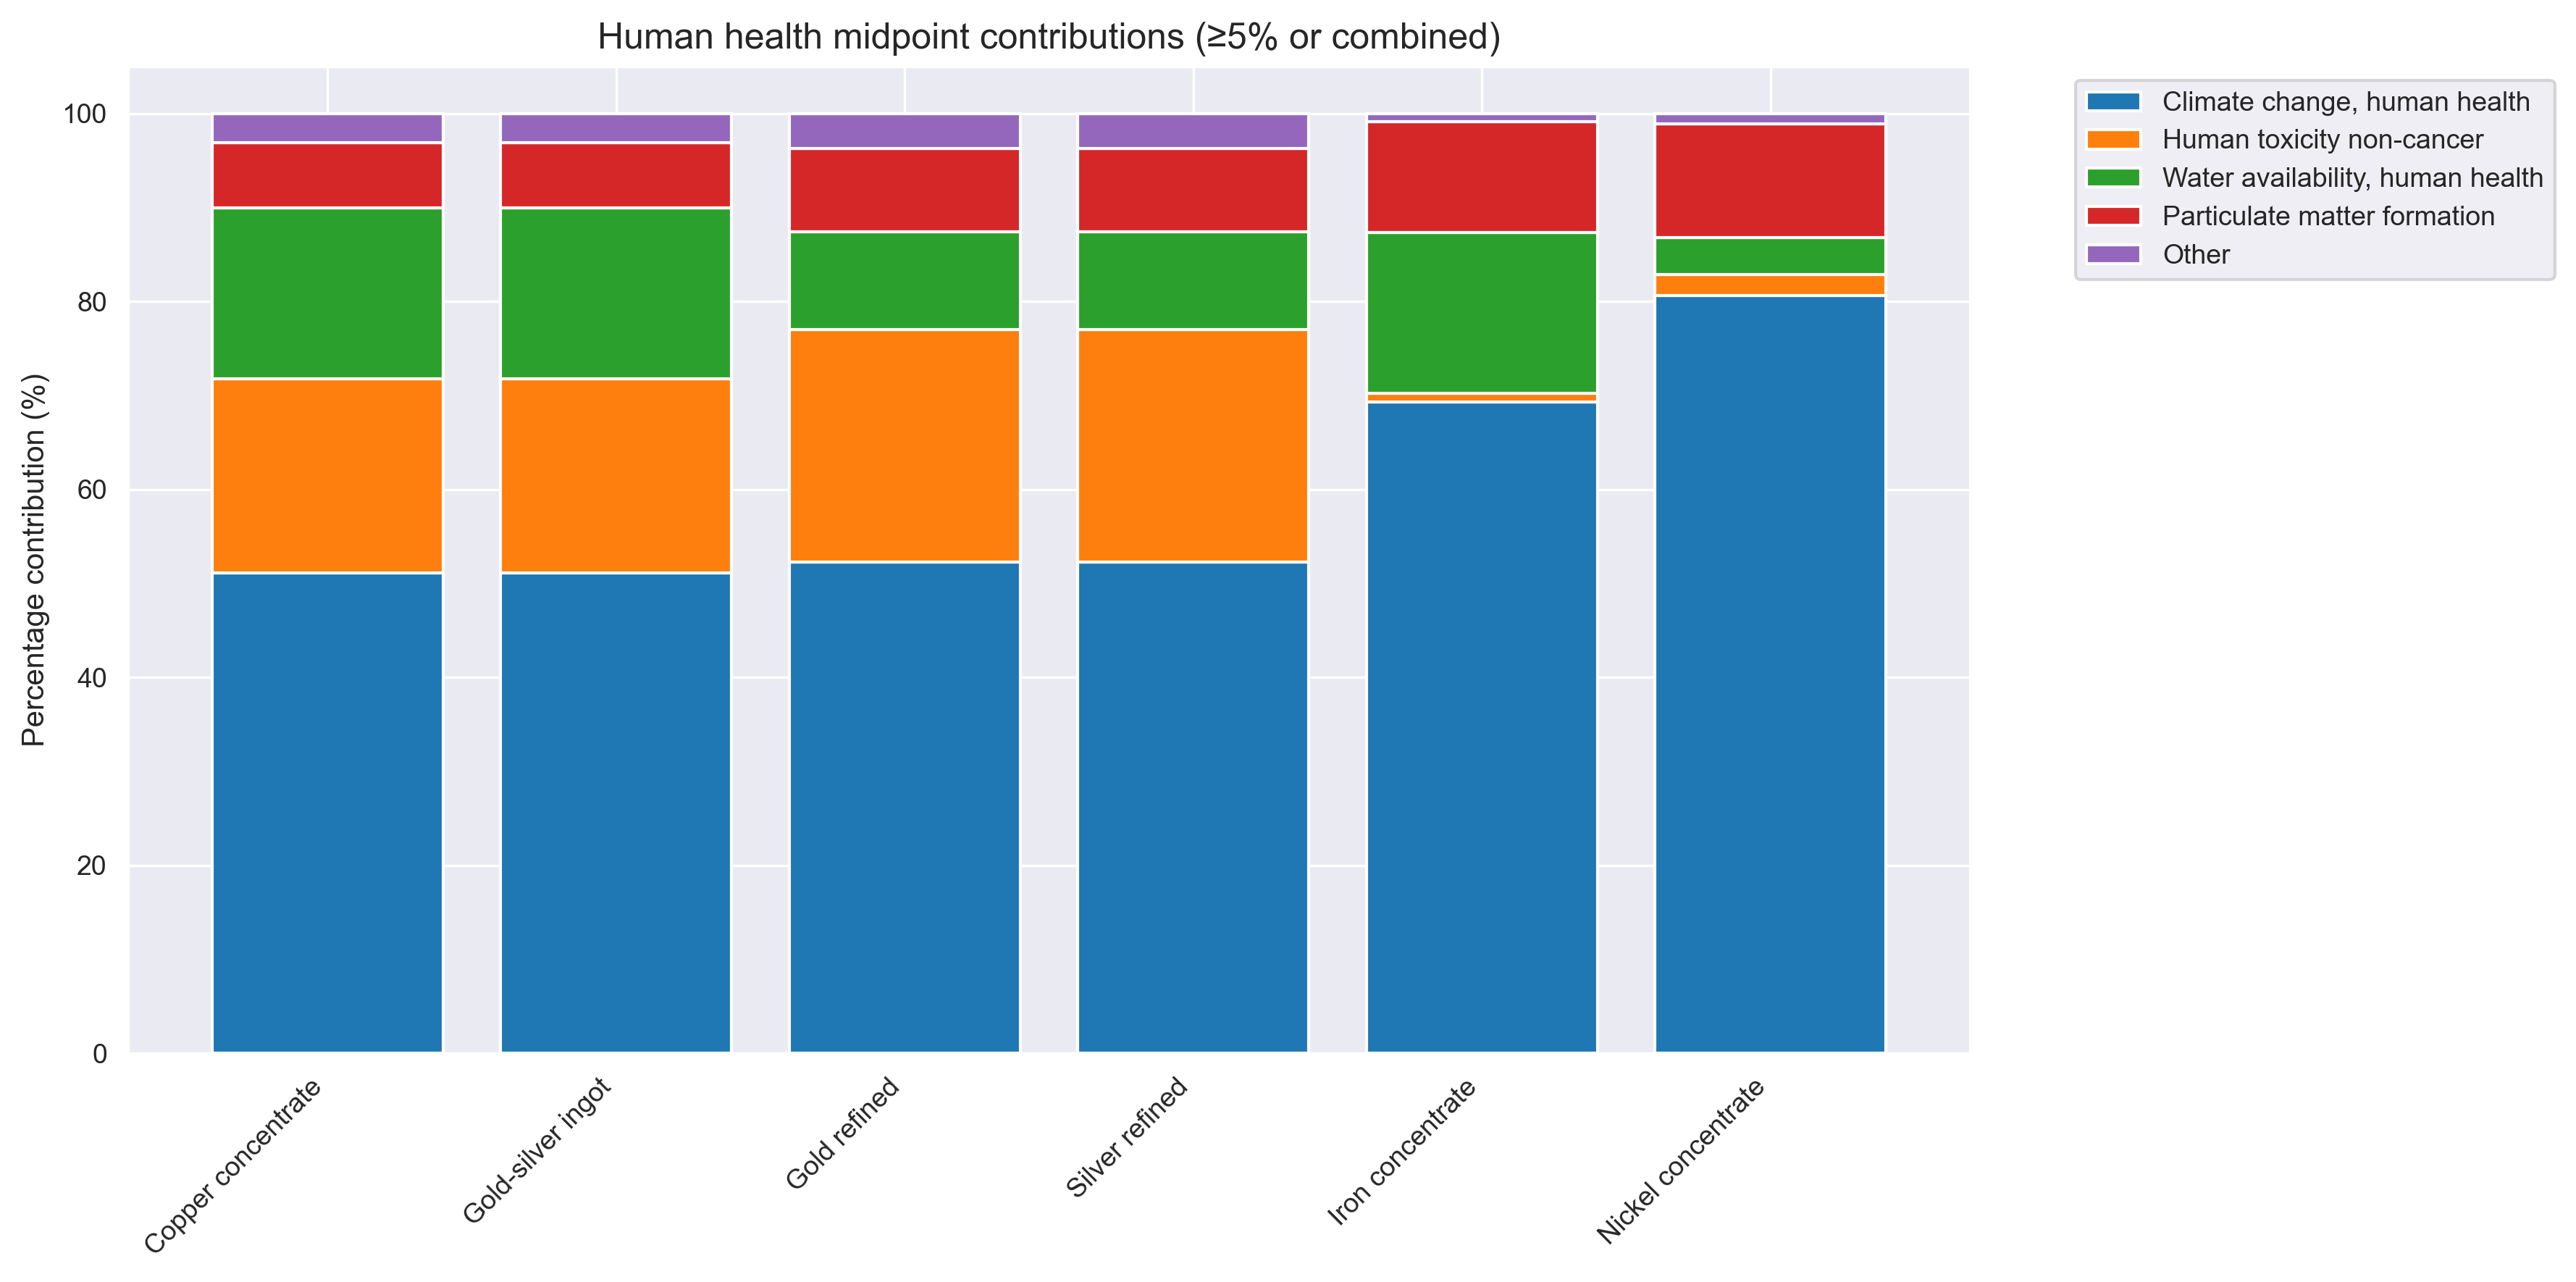

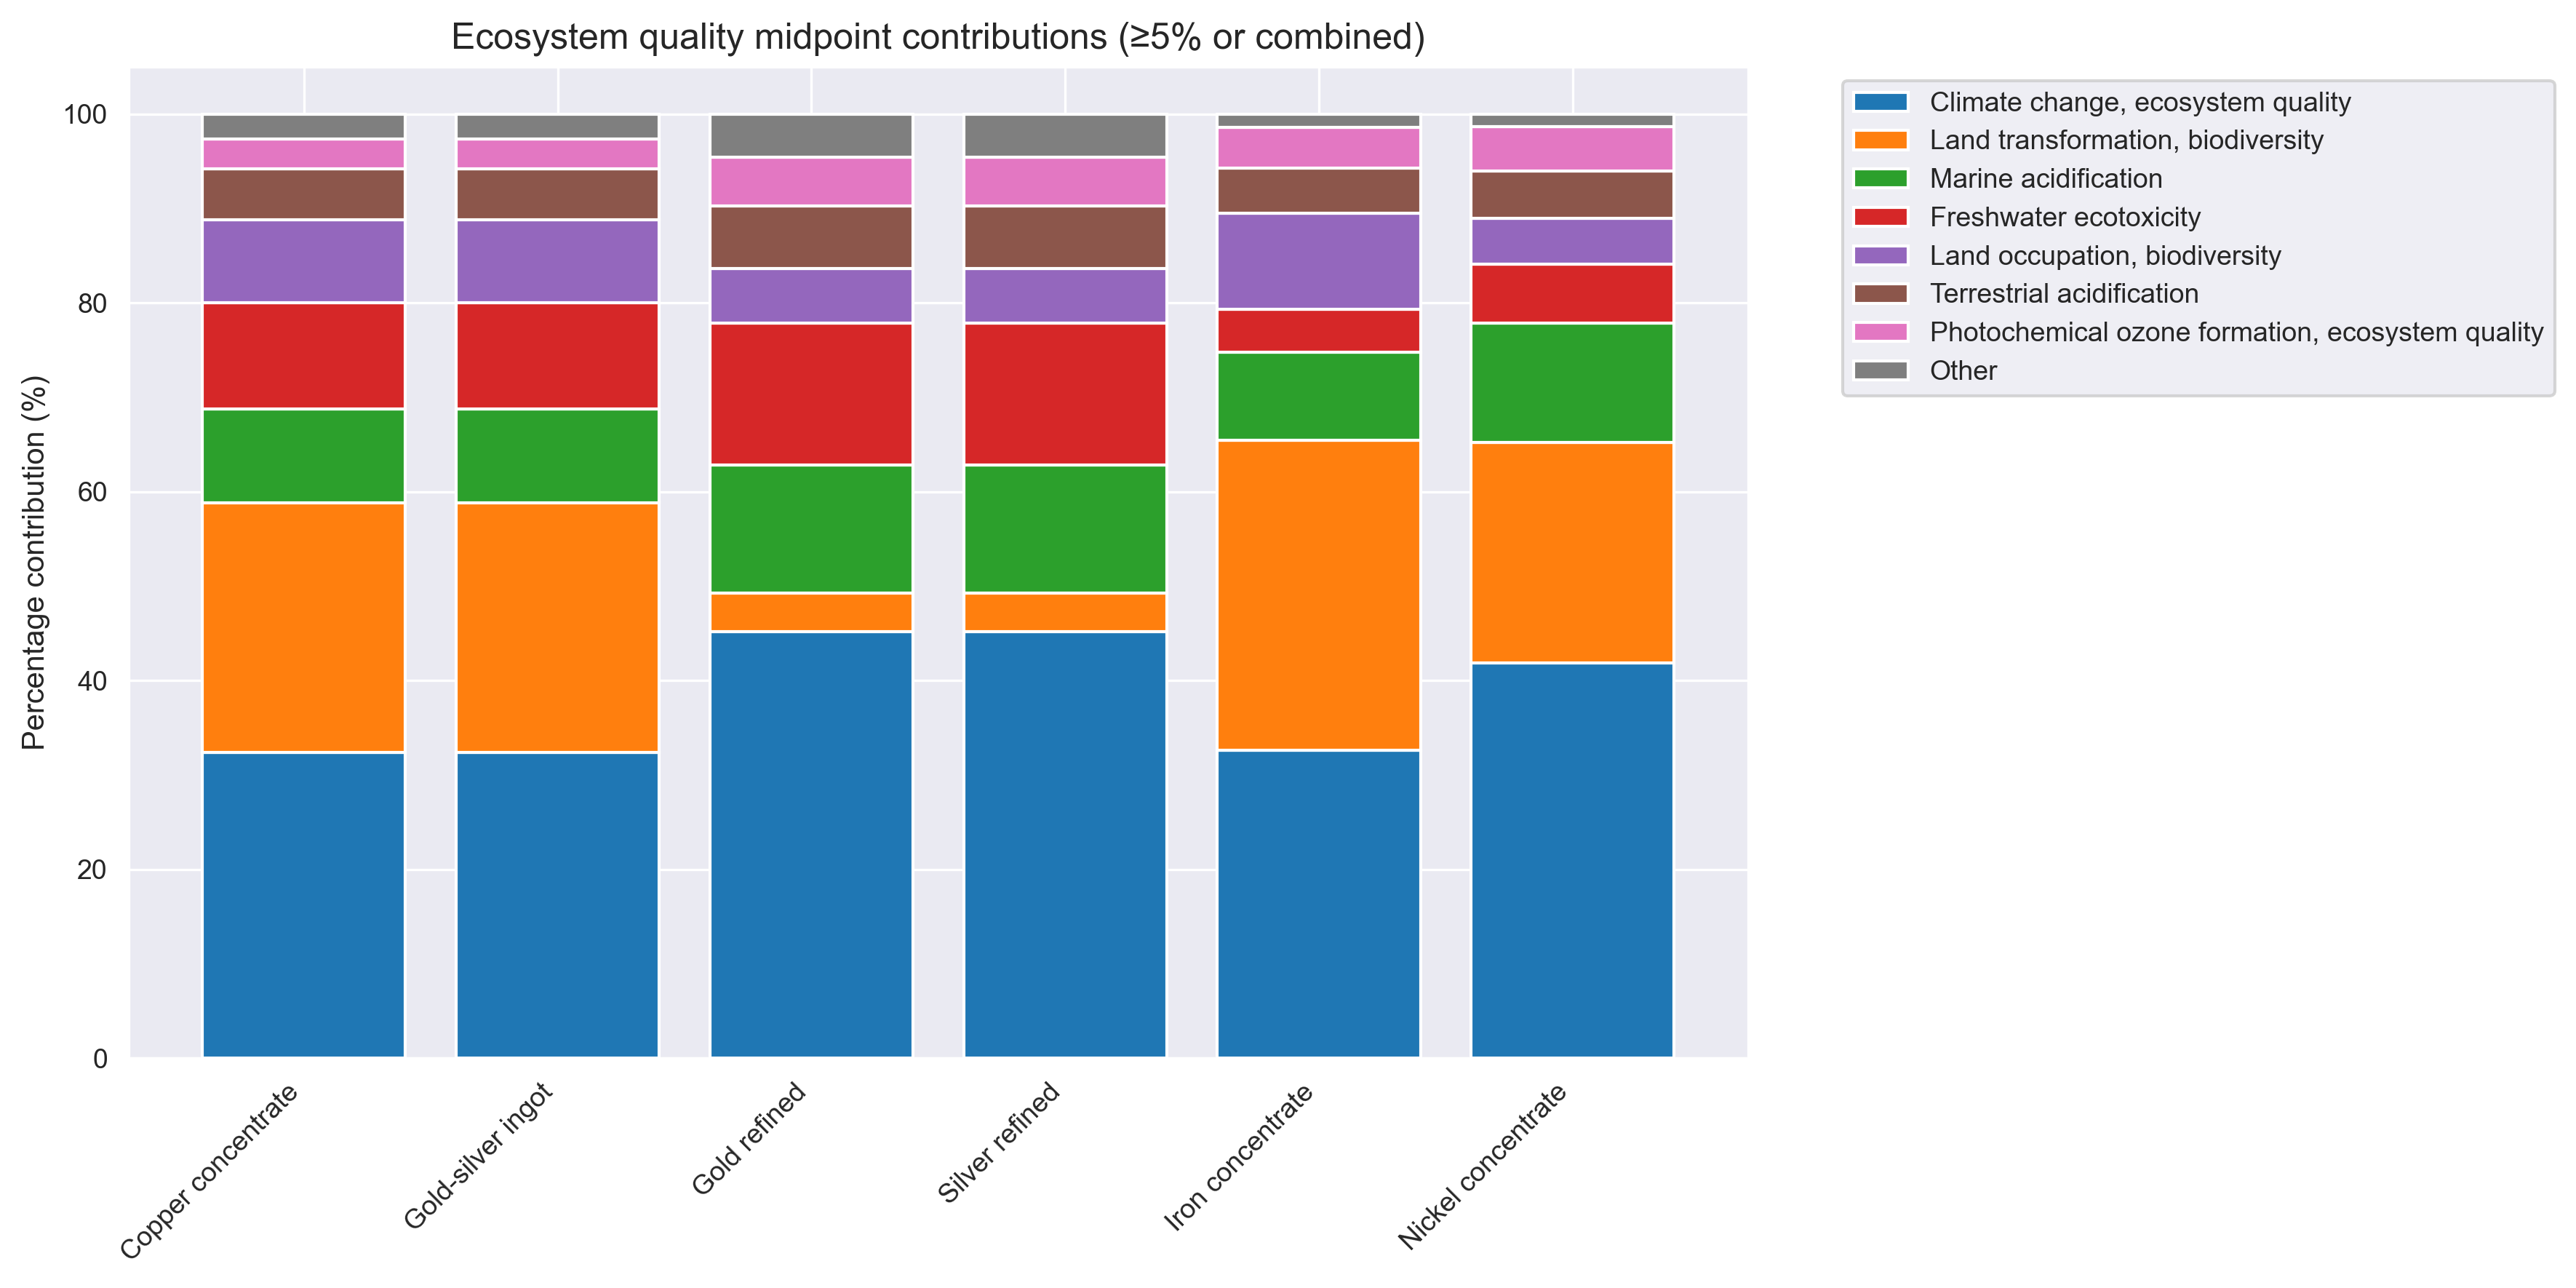

In [22]:
plot_midpoint_contributions(df_can_hh, 'Human health', save_path='results/MP_contributions/HH_MP_contributions_can.png')
plot_midpoint_contributions(df_can_eq, 'Ecosystem quality', save_path='results/MP_contributions/EQ_MP_contributions_can.png')

Plot saved to results/MP_contributions/HH_MP_contributions_market.png
Plot saved to results/MP_contributions/EQ_MP_contributions_market.png


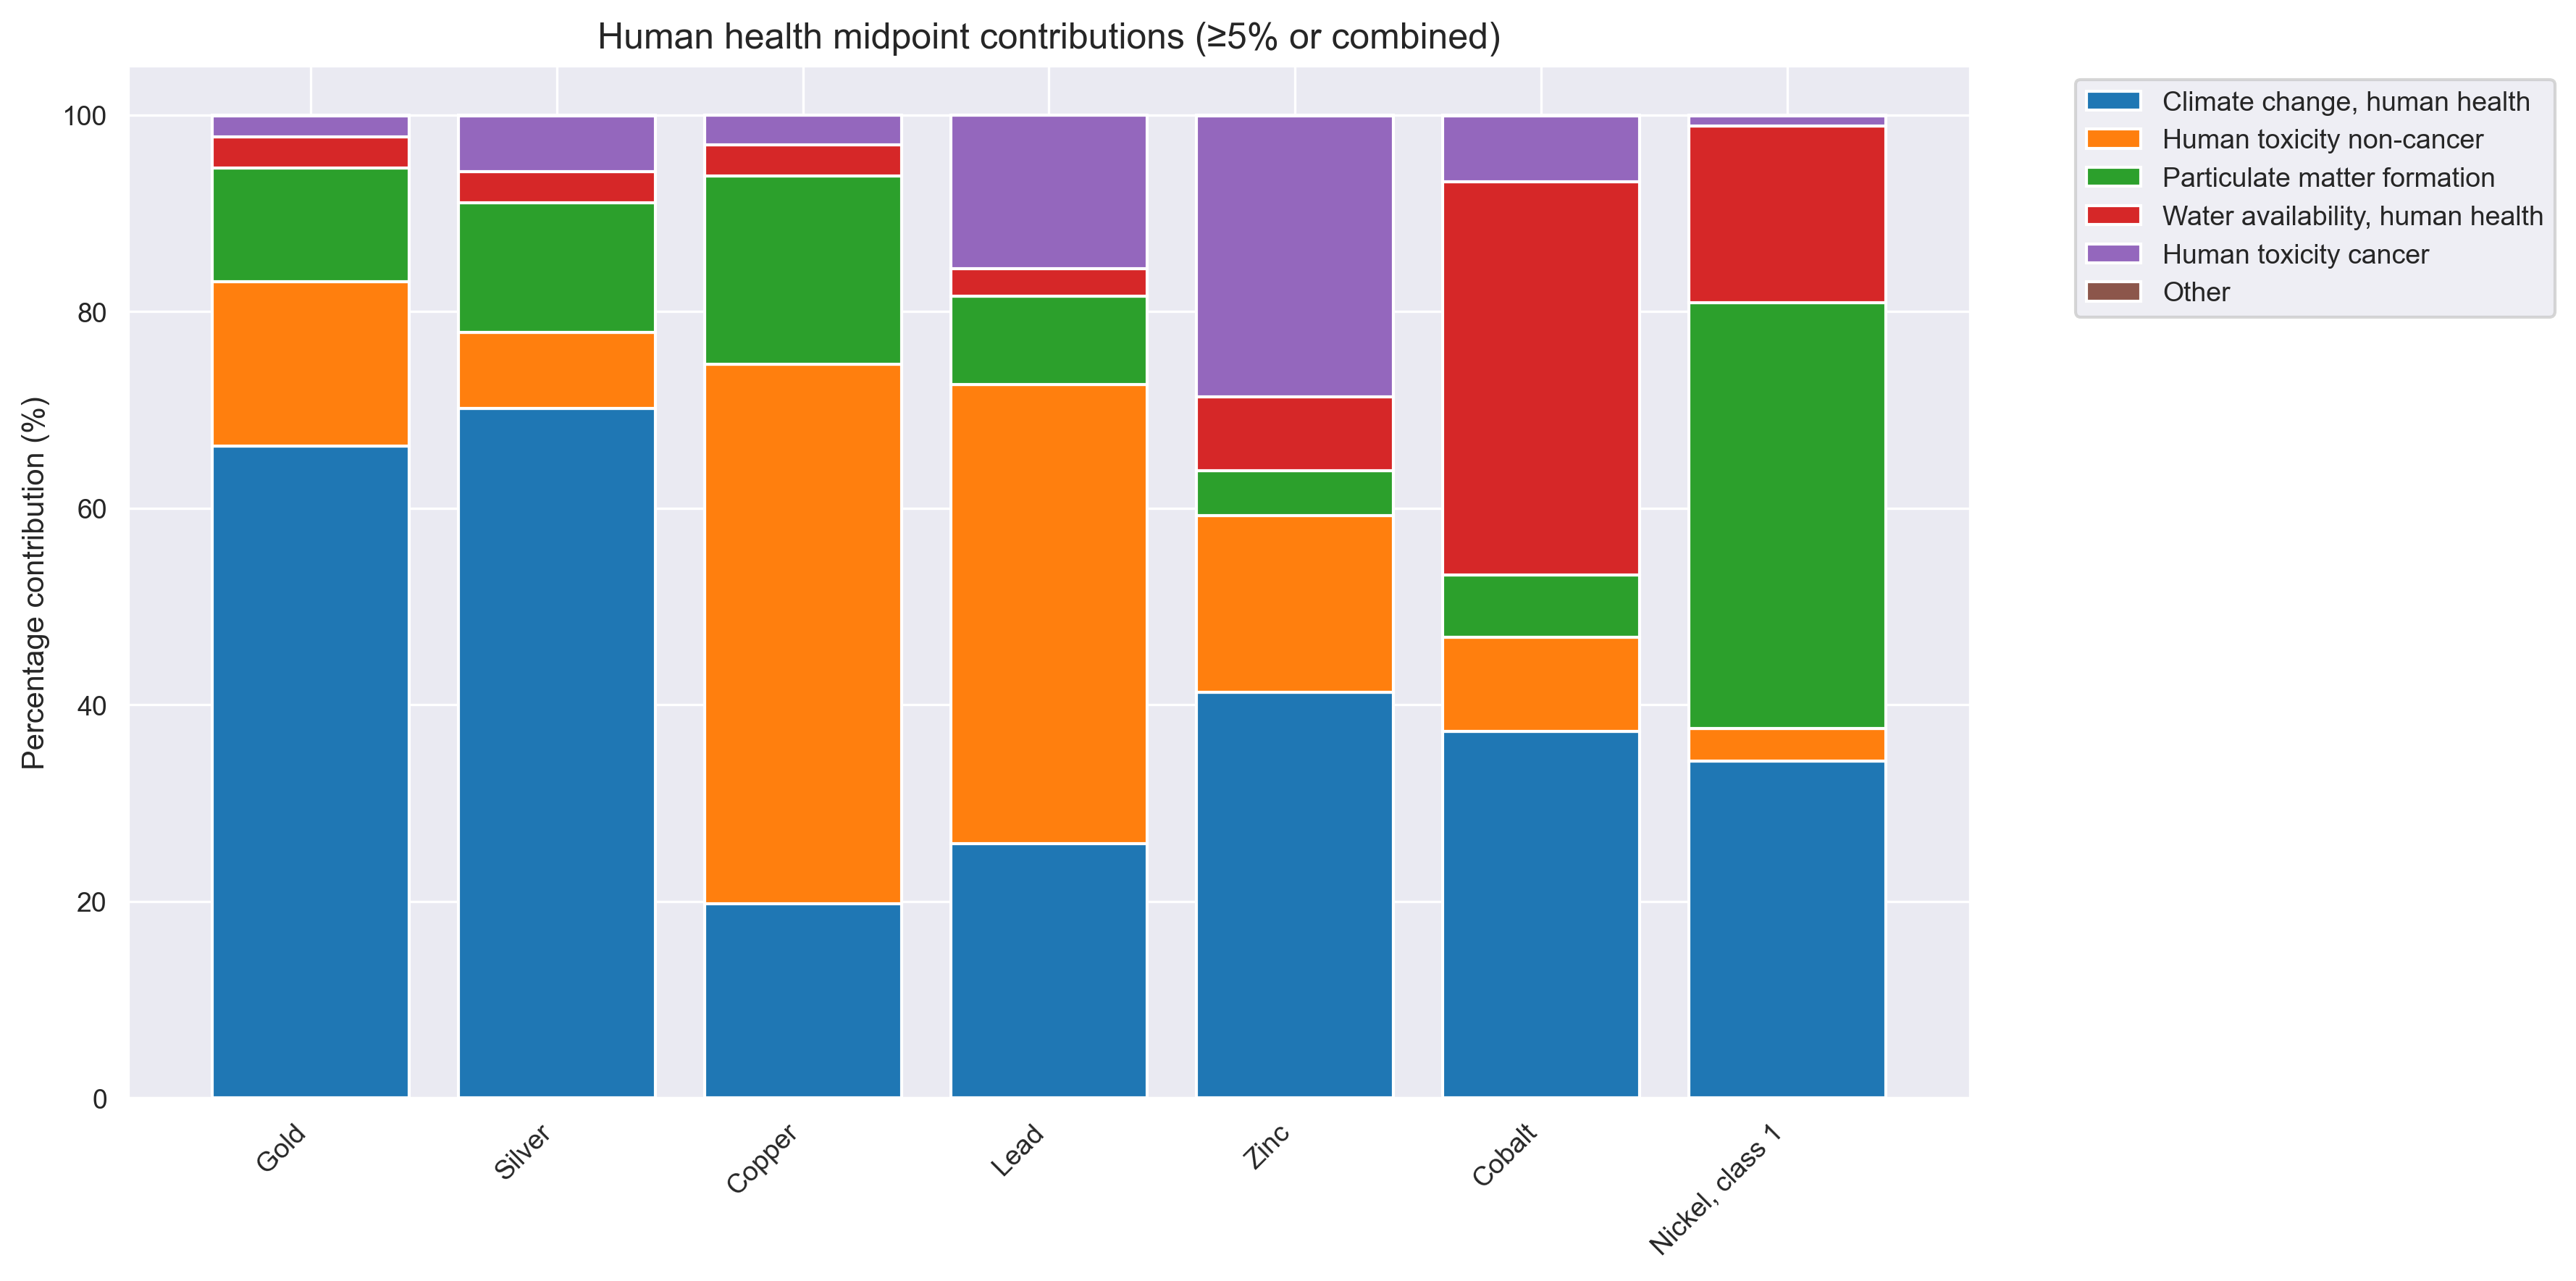

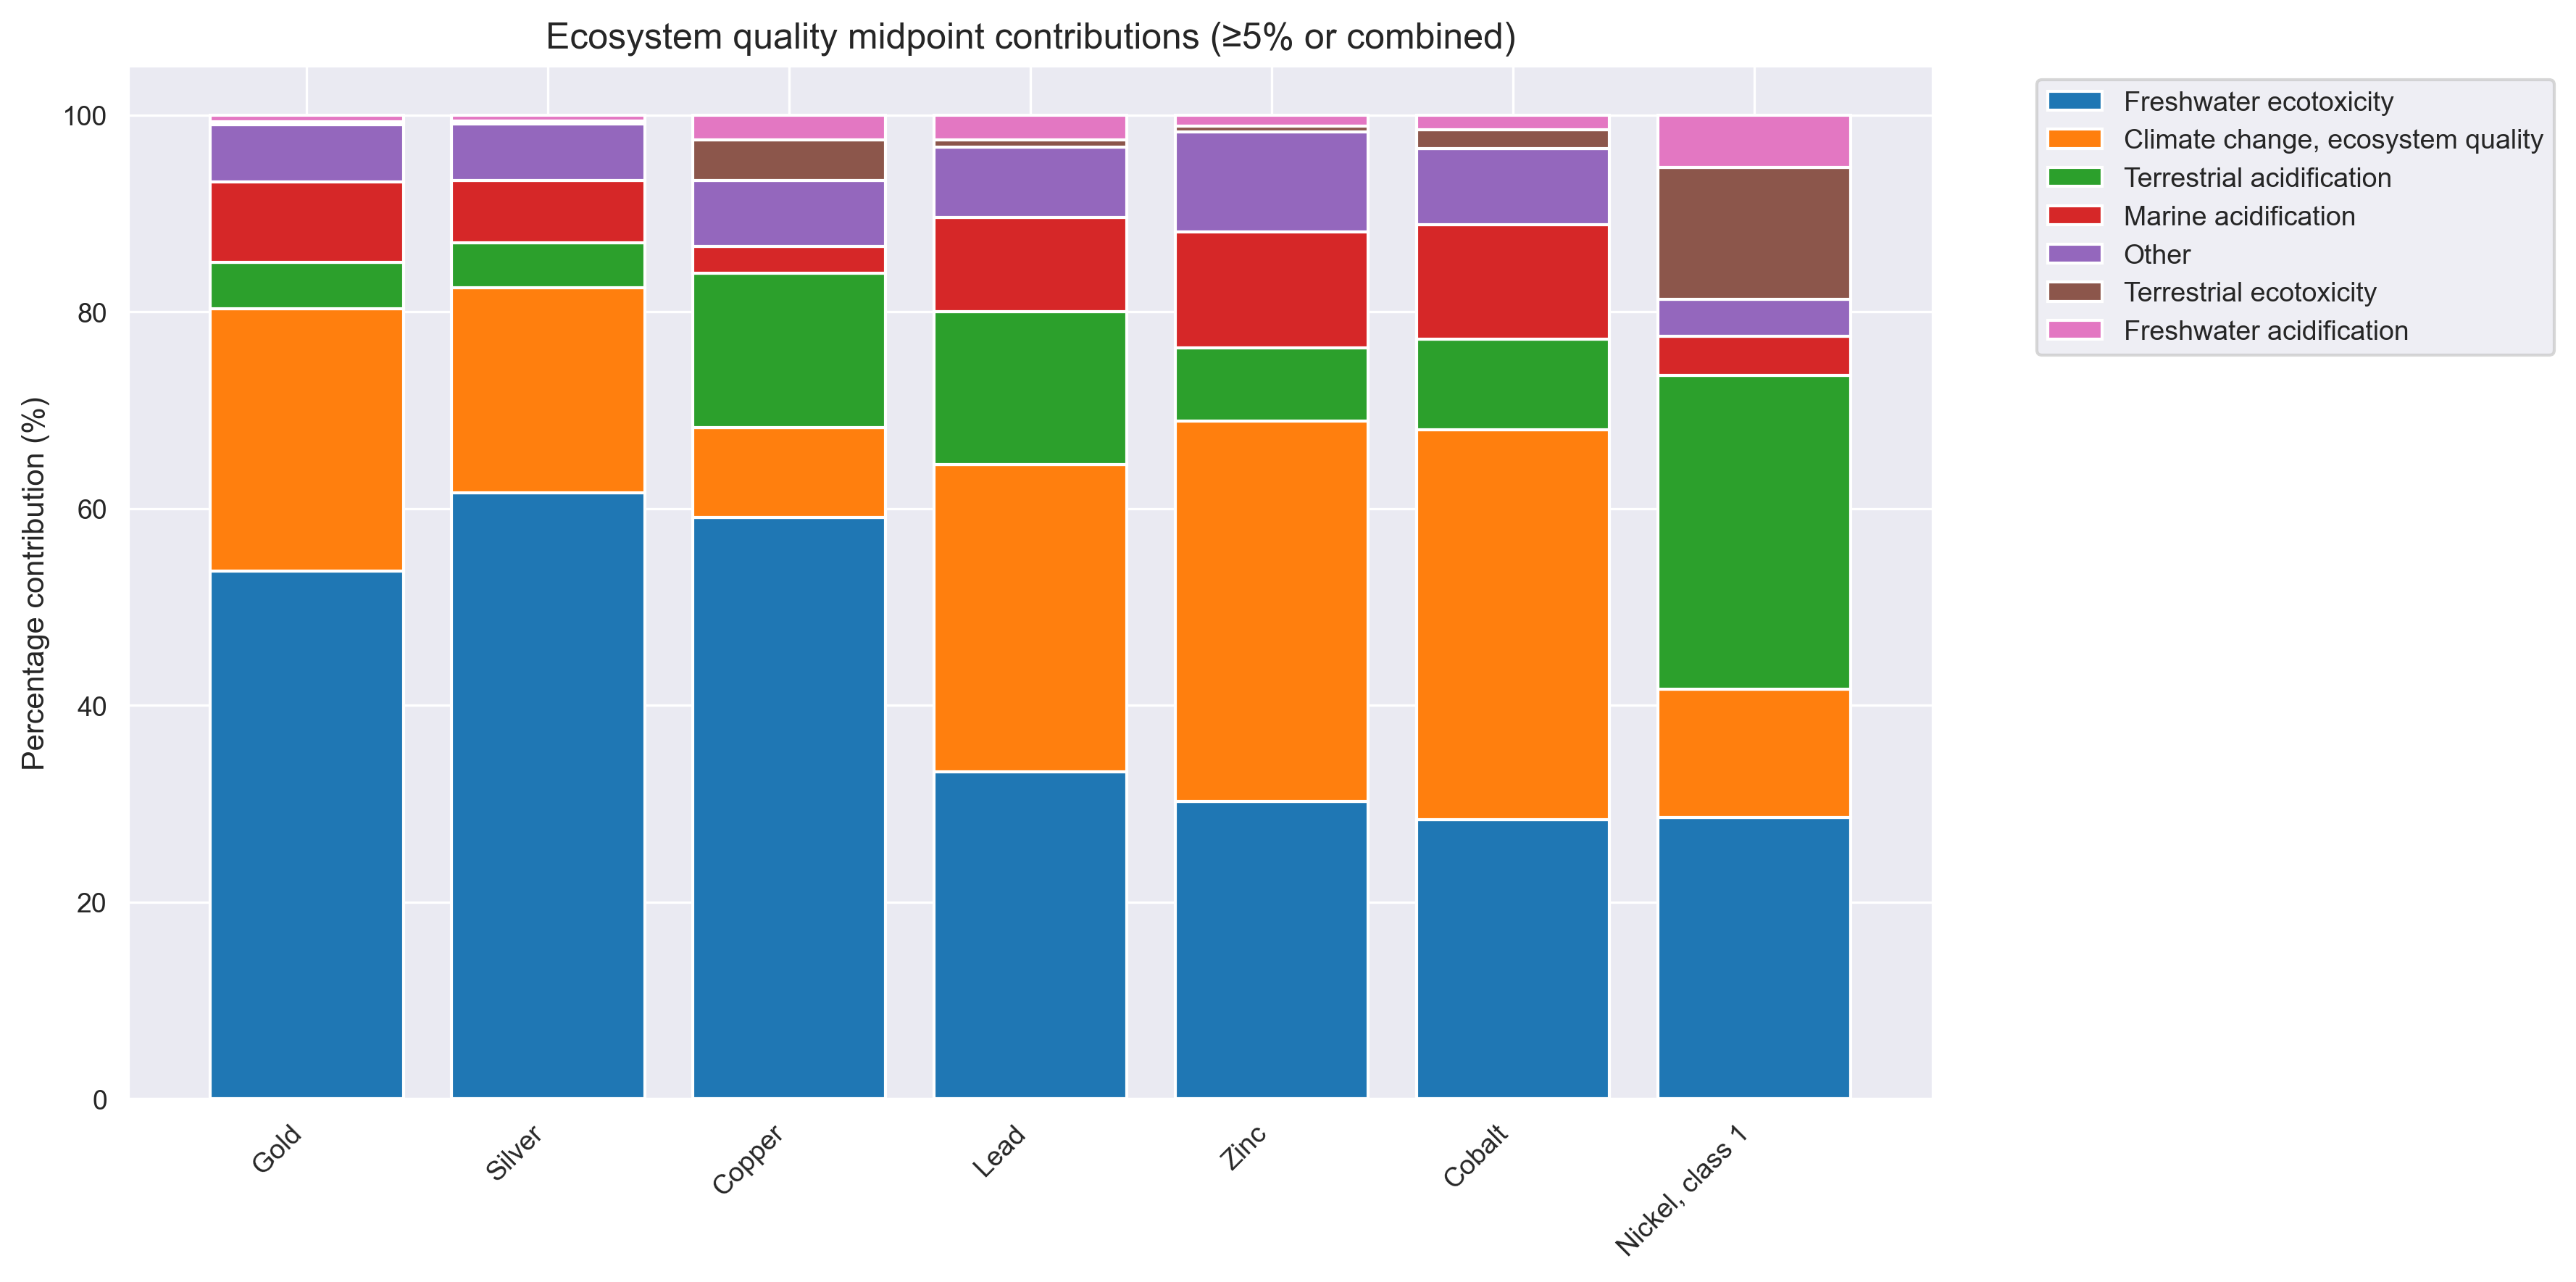

In [23]:
plot_midpoint_contributions(df_market_hh, 'Human health', save_path='results/MP_contributions/HH_MP_contributions_market.png')
plot_midpoint_contributions(df_market_eq, 'Ecosystem quality', save_path='results/MP_contributions/EQ_MP_contributions_market.png')

# Contribution analysis

In [24]:
from lca_calculation_functions import first_tier_contributions, process_contributions

In [25]:
hh_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Human health", "Total human health")
eq_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Ecosystem quality", "Total ecosystem quality")

## For CA

In [26]:
df_gold_ingot_hh = first_tier_contributions(
     INVENTORIES_CA_ds['Gold-silver ingot'],
    'Gold-silver ingot',
    hh_endpoint
 )

In [33]:
df_gold_ingot_hh

,Commodity,Activity,Product,Location,Impact_score,Share_%
0,Gold-silver ingot,"market for electricity, high voltage","electricity, high voltage",CA-QC,0.008049,20.433587
1,Gold-silver ingot,"market for cement, Portland","cement, Portland",CA-QC,0.005077,12.888599
2,Gold-silver ingot,"market for diesel, burned in building machine","diesel, burned in building machine",GLO,0.003577,9.081779
3,Gold-silver ingot,market for chromium,chromium,GLO,0.003043,7.725551
4,Gold-silver ingot,"market for heat, district or industrial, natur...","heat, district or industrial, natural gas",CA-QC,0.001843,4.679089
5,Gold-silver ingot,"market for steel, unalloyed","steel, unalloyed",GLO,0.001395,3.540485
6,Gold-silver ingot,market for sodium cyanide,sodium cyanide,RoW,0.001297,3.292017
7,Gold-silver ingot,"market for hydrogen peroxide, without water, i...","hydrogen peroxide, without water, in 50% solut...",RoW,0.001294,3.285087
8,Gold-silver ingot,"market for quicklime, milled, loose","quicklime, milled, loose",RoW,0.000913,2.317439
9,Gold-silver ingot,market for copper sulfate,copper sulfate,GLO,0.000725,1.839516


In [27]:
df_gold_ingot_eq = first_tier_contributions(
     INVENTORIES_CA_ds['Gold-silver ingot'],
    'Gold-silver ingot',
    eq_endpoint
 )

In [34]:
df_gold_ingot_eq

,Commodity,Activity,Product,Location,Impact_score,Share_%
0,Gold-silver ingot,"market for cement, Portland","cement, Portland",CA-QC,569.453931,12.361817
1,Gold-silver ingot,"market for electricity, high voltage","electricity, high voltage",CA-QC,427.909671,9.289147
2,Gold-silver ingot,"market for diesel, burned in building machine","diesel, burned in building machine",GLO,379.384250,8.235748
3,Gold-silver ingot,market for chromium,chromium,GLO,361.643791,7.850634
4,Gold-silver ingot,"market for heat, district or industrial, natur...","heat, district or industrial, natural gas",CA-QC,197.326154,4.283595
5,Gold-silver ingot,market for copper sulfate,copper sulfate,GLO,193.085029,4.191528
6,Gold-silver ingot,"market for hydrogen peroxide, without water, i...","hydrogen peroxide, without water, in 50% solut...",RoW,162.670578,3.531285
7,Gold-silver ingot,"market for steel, unalloyed","steel, unalloyed",GLO,142.239123,3.087755
8,Gold-silver ingot,market for sodium cyanide,sodium cyanide,RoW,138.534228,3.007328
9,Gold-silver ingot,"market for mine infrastructure, underground, n...","mine infrastructure, underground, non-ferrous ...",GLO,94.488501,2.051175


In [28]:
df_copper_conc_hh = first_tier_contributions(
     INVENTORIES_CA_ds['Copper concentrate'],
    'Copper concentrate',
    hh_endpoint
 )

In [30]:
df_copper_conc_eq = first_tier_contributions(
     INVENTORIES_CA_ds['Copper concentrate'],
    'Copper concentrate',
    eq_endpoint
 )

In [31]:
df_nickel_conc_hh = first_tier_contributions(
     INVENTORIES_CA_ds['Nickel concentrate'],
    'Nickel concentrate',
    hh_endpoint
 )

In [32]:
df_nickel_conc_eq = first_tier_contributions(
     INVENTORIES_CA_ds['Nickel concentrate'],
    'Nickel concentrate',
    eq_endpoint
 )

In [97]:
# For Gold, top 8 full‐chain processes:
df_gold_proc = process_contributions(
    INVENTORIES_CA_ds["Gold"],
    "Gold",
    hh_endpoint,
    amount=1,
    threshold=0.01
)

In [98]:
df_gold_proc

,Commodity,Activity,Product,Location,Impact_score,Share_%
0,Gold,gold production,gold,AU,0.048204,9.681006
1,Gold,"electricity production, hard coal, conventional","electricity, high voltage",ZA,0.040861,8.206166
2,Gold,"electricity production, hard coal, at coal min...","electricity, high voltage, for internal use in...",CN,0.020487,4.114513
3,Gold,"diesel, burned in building machine","diesel, burned in building machine",GLO,0.020425,4.101939
4,Gold,"gold mine operation and gold production, unref...","gold, unrefined",RoW,0.019660,3.948302
5,Gold,"diesel, burned in diesel-electric generating s...","diesel, burned in diesel-electric generating s...",GLO,0.012285,2.467197
6,Gold,"electricity production, hard coal","electricity, high voltage",CN-NM,0.011135,2.236252
7,Gold,"electricity production, hard coal","electricity, high voltage",CN-SD,0.008534,1.713997
8,Gold,zinc mine operation,zinc concentrate,GLO,0.007488,1.503746
9,Gold,"electricity production, hard coal","electricity, high voltage",CN-XJ,0.006465,1.298315


# Compare EI vs RI

In [6]:
df_ei_ep = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ei_ep')
df_ei_eq = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ei_eq')
df_ei_hh = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ei_hh')
df_ri_ep = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ri_ep')
df_ri_eq = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ri_eq')
df_ri_hh = pd.read_excel(r'results/graphs_ei_ri/ei_vs_ri.xlsx', sheet_name='df_ri_hh')

In [ ]:
from visualisation_functions import plot_relative_difference_heatmap

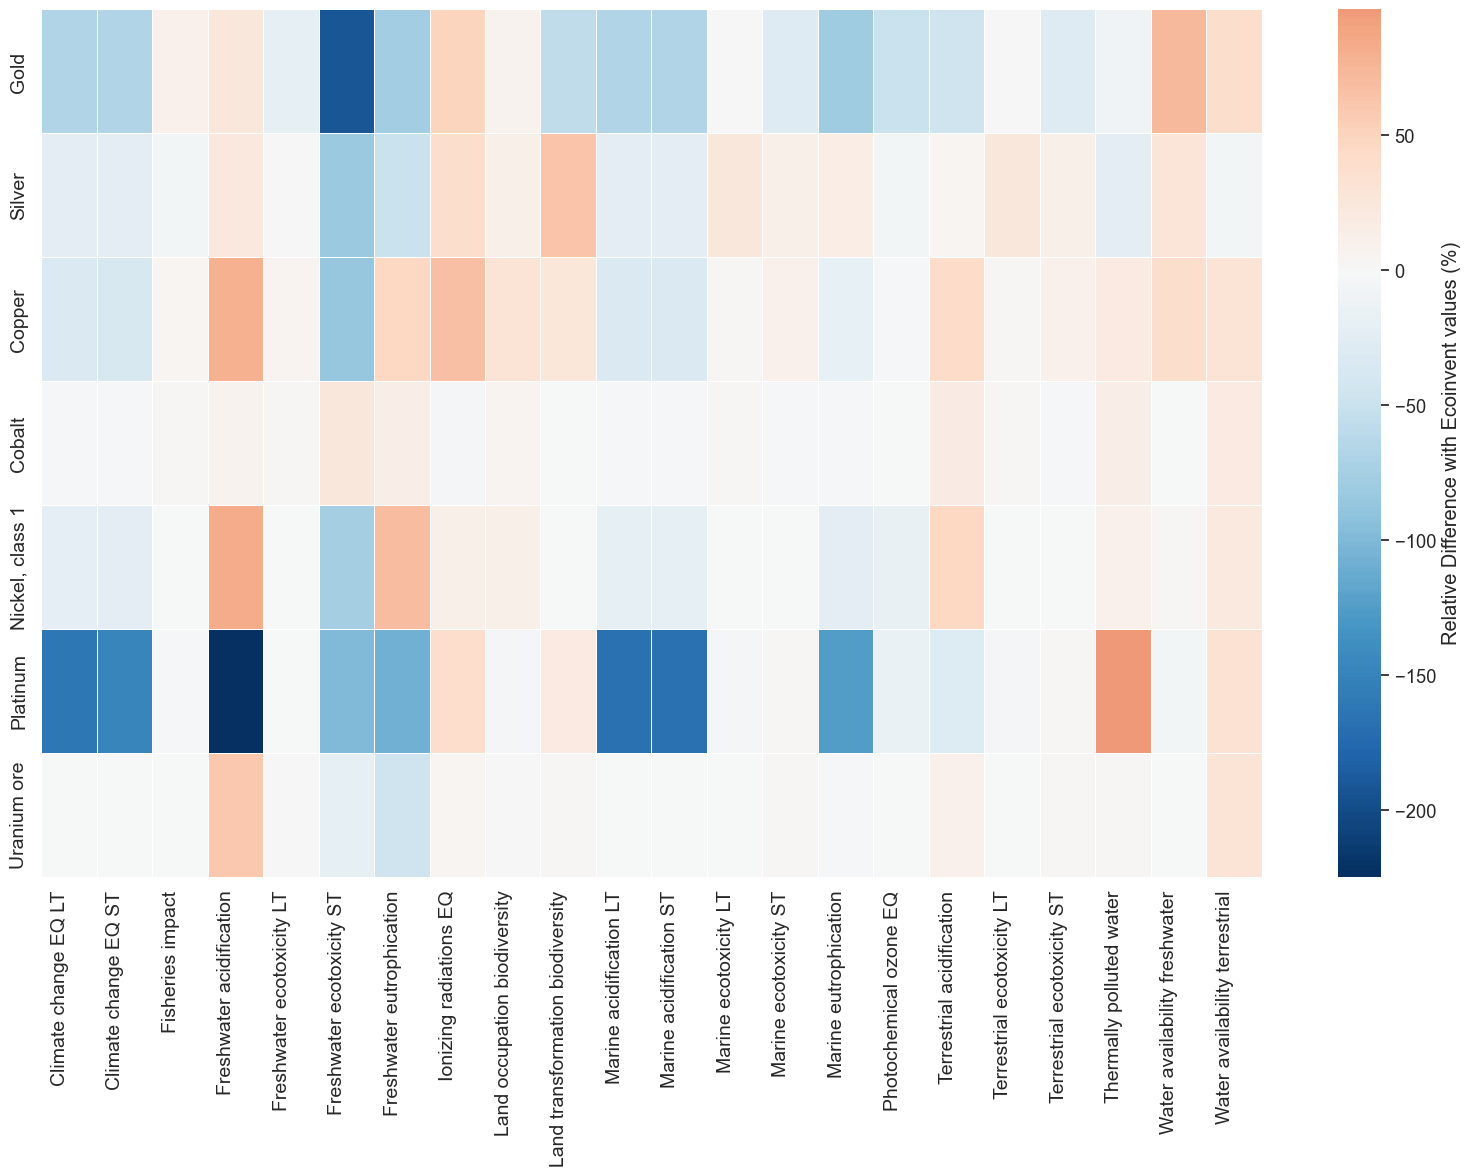

In [19]:
plot_relative_difference_heatmap(df_ei_eq, df_ri_eq, title='', output_png='results/graphs_ei_ri/heatmap_eq.png')

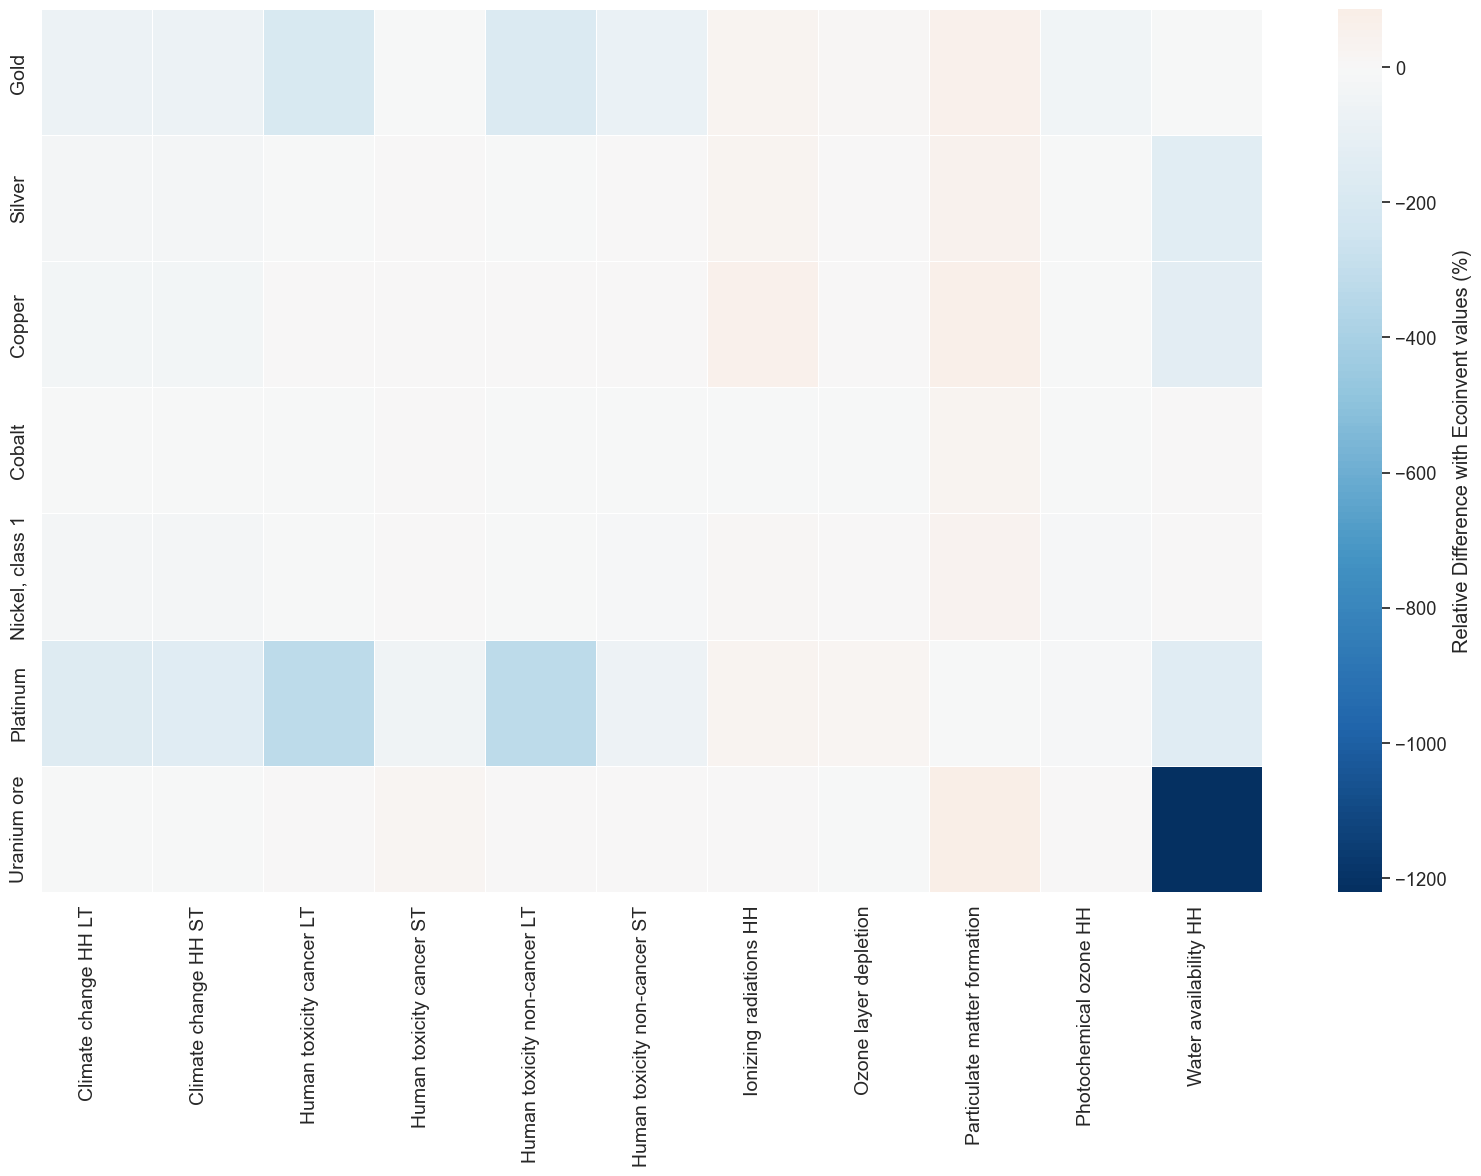

In [20]:
plot_relative_difference_heatmap(df_ei_hh, df_ri_hh, title='', output_png='results/graphs_ei_ri/heatmap_hh.png')